# ***Loading Necessary Models,Tools and Packages***

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd
from xgboost import XGBRegressor
from sklearn.model_selection import GridSearchCV, KFold
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
import seaborn as sns
import lightgbm as lgb

# ***Loading of Test and Train Data***

In [3]:
train_data=pd.read_csv('/kaggle/input/anyas-gojo-revival/sheet1.csv')
test_data=pd.read_csv('/kaggle/input/anyas-gojo-revival/sheet2.csv')

In [4]:
train_data.head()

,id,a,b,c,d,e,f,g,h,i,...,n,o,p,q,r,s,t,u,v,target
0,1,15-01-2021,1.5570,27337.8060,17558,4.88,424741,424745.88,101,105,...,443,940,30.63,0.0,0.0,356,27337,1530.0084,00:03:21,5.785
1,2,24-07-2019,1.2616,1553.0296,1231,5.64,21688,21693.64,1,4,...,14,31,27.86,0.0,0.0,8,1553,60.2926,00:02:19,0.826
2,3,09-08-2020,1.8000,4563.0000,2535,6.15,57690,57696.15,27,30,...,162,232,25.98,0.0,0.0,103,4563,230.7383,00:03:02,1.201
3,4,12-06-2019,1.2996,2117.0484,1629,5.76,27800,27805.76,9,3,...,34,64,26.28,0.0,0.0,19,2117,100.3671,00:02:50,0.963
4,5,02-06-2021,2.4762,231408.3186,93453,4.26,4175116,4175120.26,464,417,...,2325,9126,33.26,0.0,0.0,1997,231404,17511.5046,00:04:32,59.635


In [5]:
test_data.head()

,id,a,b,c,d,e,f,g,h,i,...,m,n,o,p,q,r,s,t,u,v
0,1,12-10-2020,1.6106,6683.9900,4150,5.86,82477,82482.86,27,41,...,46,147,242,27.96,0.0,0.0,101,6684,361.8757,00:03:14
1,2,04-02-2021,1.6255,24065.5275,14805,4.94,360696,360700.94,83,81,...,103,334,1048,31.87,0.0,0.0,231,24066,1472.3777,00:03:40
2,3,08-10-2019,1.5132,1091.0172,721,6.39,13192,13198.39,0,3,...,4,15,13,25.78,0.0,0.0,11,1091,39.3224,00:02:09
3,4,01-12-2019,1.4206,608.0168,428,5.97,8810,8815.97,2,0,...,5,14,9,26.03,0.0,0.0,9,608,21.0277,00:02:04
4,5,04-09-2020,1.6092,15979.3560,9930,6.89,182250,182256.89,78,55,...,69,346,997,28.86,0.0,0.0,277,15979,854.6027,00:03:12


In [6]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 69 entries, 0 to 68
Data columns (total 24 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   id      69 non-null     int64  
 1   a       69 non-null     object 
 2   b       69 non-null     float64
 3   c       69 non-null     float64
 4   d       69 non-null     int64  
 5   e       69 non-null     float64
 6   f       69 non-null     int64  
 7   g       69 non-null     float64
 8   h       69 non-null     int64  
 9   i       69 non-null     int64  
 10  j       69 non-null     float64
 11  k       69 non-null     float64
 12  l       69 non-null     int64  
 13  m       69 non-null     int64  
 14  n       69 non-null     int64  
 15  o       69 non-null     int64  
 16  p       69 non-null     float64
 17  q       61 non-null     float64
 18  r       61 non-null     float64
 19  s       69 non-null     int64  
 20  t       69 non-null     int64  
 21  u       69 non-null     float64
 22  v   

In [7]:
train_data.describe()

,id,b,c,d,e,f,g,h,i,j,...,m,n,o,p,q,r,s,t,u,target
count,69.000000,69.000000,69.000000,69.000000,69.000000,6.900000e+01,6.900000e+01,69.000000,69.000000,69.000000,...,69.000000,69.000000,69.000000,69.000000,61.000000,61.000000,69.000000,69.000000,69.000000,69.000000
mean,35.000000,1.648032,62417.801312,29880.869565,6.242609,9.788619e+05,9.788682e+05,363.405797,123.565217,96.202754,...,162.826087,689.347826,3645.985507,29.505217,0.114754,0.098361,526.521739,62417.739130,5060.788681,26.924029
std,20.062403,0.360947,127075.100701,60728.776208,1.638369,1.883569e+06,1.883568e+06,1495.362727,246.567046,12.139610,...,324.334611,1181.515562,10104.754538,6.042470,0.321370,0.351422,870.371094,127075.252151,11551.221264,66.567287
min,1.000000,1.037000,21.000600,18.000000,3.640000,1.970000e+02,2.056300e+02,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,13.990000,0.000000,0.000000,-3.000000,21.000000,1.029700,0.000000
25%,18.000000,1.431200,683.001000,505.000000,5.060000,8.701000e+03,8.707260e+03,2.000000,3.000000,97.210000,...,6.000000,10.000000,17.000000,25.220000,0.000000,0.000000,6.000000,683.000000,22.976500,0.250000
50%,35.000000,1.545200,8344.803600,5436.000000,5.990000,7.848600e+04,7.849377e+04,29.000000,26.000000,98.140000,...,30.000000,163.000000,333.000000,29.320000,0.000000,0.000000,124.000000,8345.000000,374.519200,2.470000
75%,52.000000,1.817400,27496.112400,17558.000000,6.960000,3.980480e+05,3.980531e+05,110.000000,85.000000,99.090000,...,92.000000,518.000000,1322.000000,33.540000,0.000000,0.000000,445.000000,27496.000000,1745.081300,9.296000
max,69.000000,2.560000,652107.703900,321437.000000,11.420000,7.768271e+06,7.768277e+06,11582.000000,1405.000000,100.000000,...,1520.000000,4959.000000,58446.000000,47.810000,1.000000,2.000000,3785.000000,652105.000000,64133.824700,397.066000


**getting target column for model training**

In [8]:
train_target=train_data['target']

****dropping unneccsary columns in test and train data****

In [9]:
train_data.pop('id')
train_data.pop('a')
train_data.pop('target')
test_data.pop('id')
test_data.pop('a')

0       12-10-2020
1       04-02-2021
2       08-10-2019
3       01-12-2019
4       04-09-2020
           ...    
1059    04-09-2019
1060    24-02-2019
1061    22-09-2020
1062    25-03-2019
1063    20-10-2020
Name: a, Length: 1064, dtype: object

# ***Filling Null Values and Conversions***

**checking null values in train and test data**

In [10]:
train_data.isnull().sum()

b    0
c    0
d    0
e    0
f    0
g    0
h    0
i    0
j    0
k    0
l    0
m    0
n    0
o    0
p    0
q    8
r    8
s    0
t    0
u    0
v    0
dtype: int64

In [11]:
test_data.isnull().sum()

b      0
c      0
d      0
e      0
f      0
g      0
h      0
i      0
j     37
k      0
l      0
m      0
n      0
o      0
p      0
q    134
r    134
s      0
t      0
u      0
v      0
dtype: int64

**Applying Forward Interpolation to fill null Values**

In [12]:
train_data.fillna(0, inplace=True)

In [13]:
test_data=test_data.interpolate(method='linear',limit_direction='forward')

**Converting time into useful numerical column**

In [14]:
train_data['v']=train_data['v'].apply(lambda x:int(x.split(":")[2])+int(x.split(":")[1])*60+int(x.split(":")[0])*3600)
test_data['v']=test_data['v'].apply(lambda x:int(x.split(":")[2])+int(x.split(":")[1])*60+int(x.split(":")[0])*3600)

# ****Data Visualization****

<Axes: >

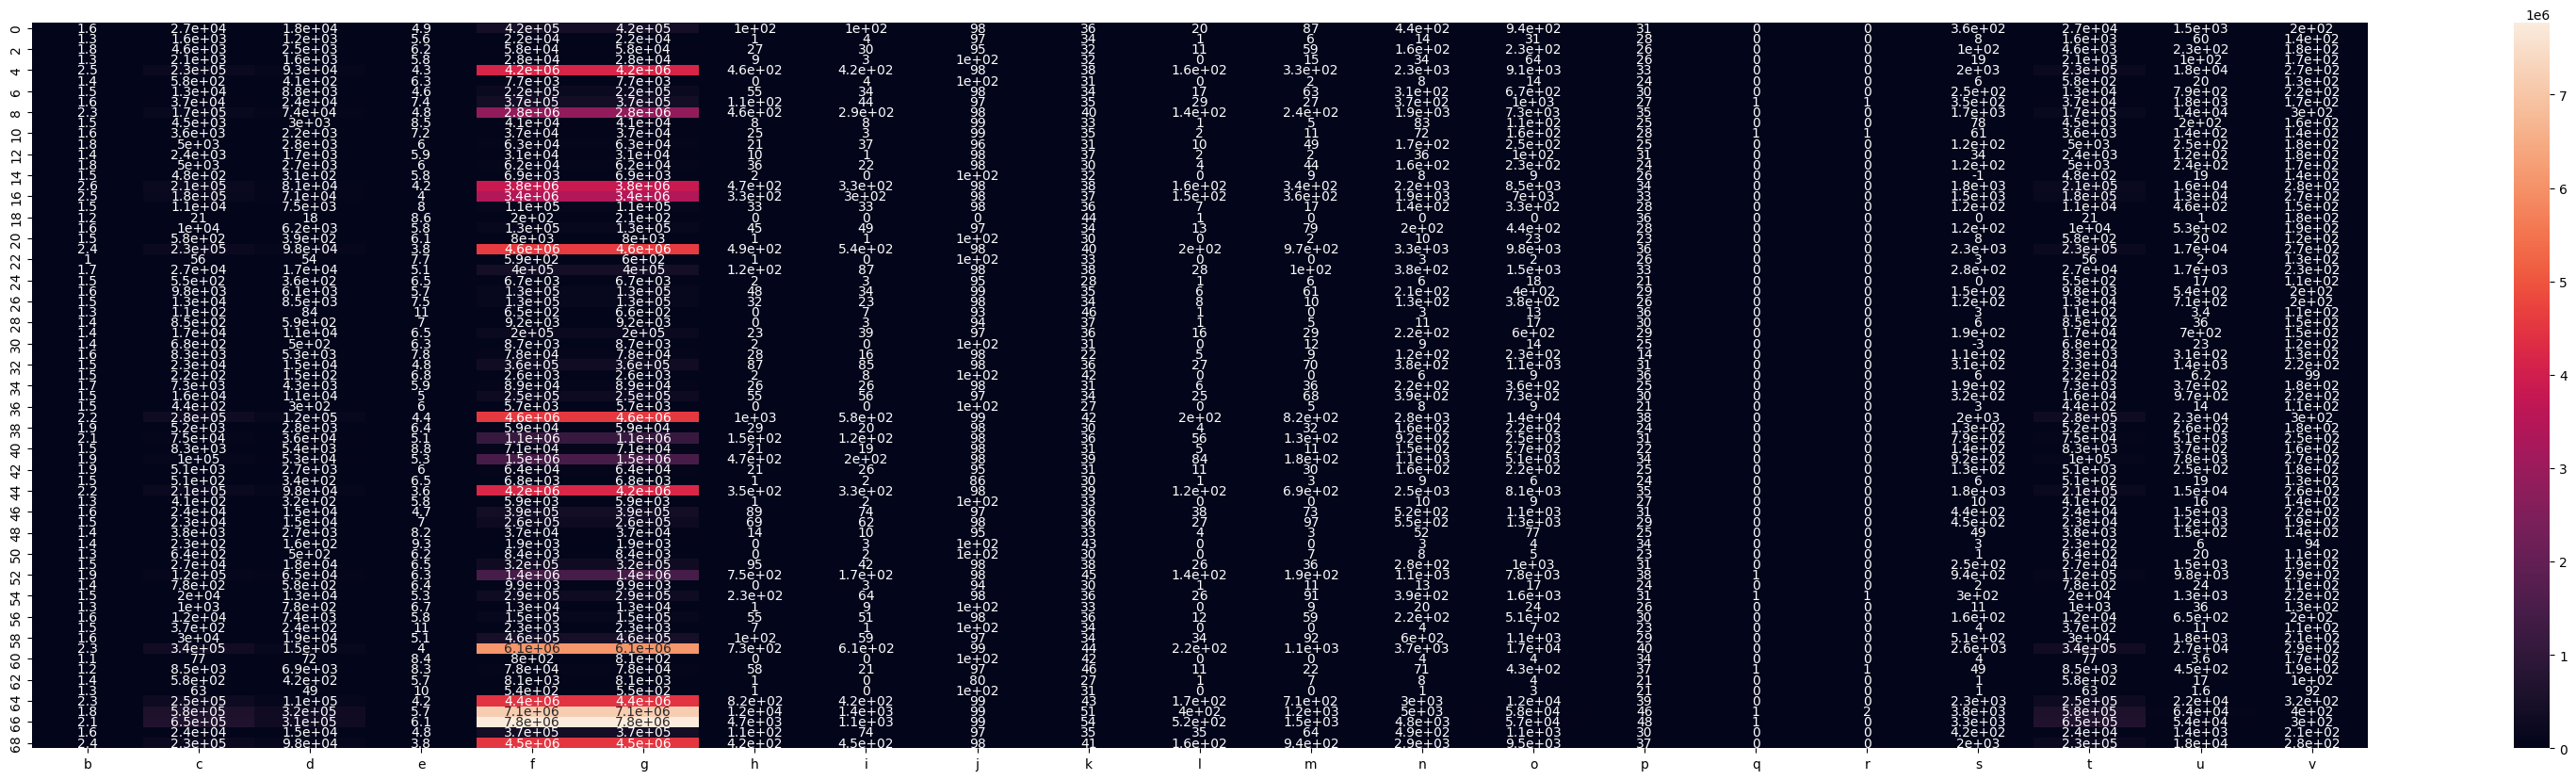

In [15]:
plt.figure(figsize=(40,10))
sns.heatmap(data=train_data, annot=True)

In [16]:
data=pd.read_csv('/kaggle/input/anyas-gojo-revival/sheet1.csv')

In [17]:
cate_cols=[i for i in train_data.columns if train_data[i].dtype in ["int64","float64"]]
print(cate_cols)

['b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'q', 'r', 's', 't', 'u', 'v']


<Figure size 1000x700 with 0 Axes>

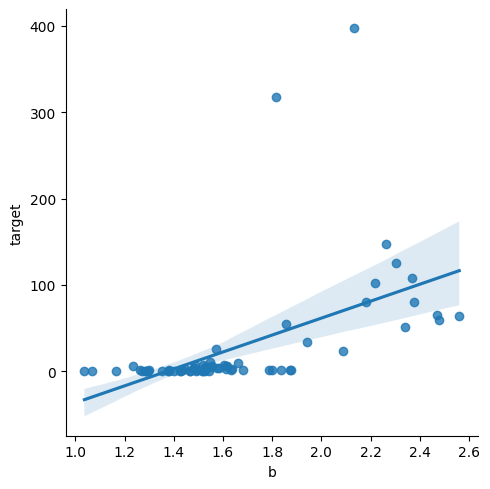

<Figure size 1000x700 with 0 Axes>

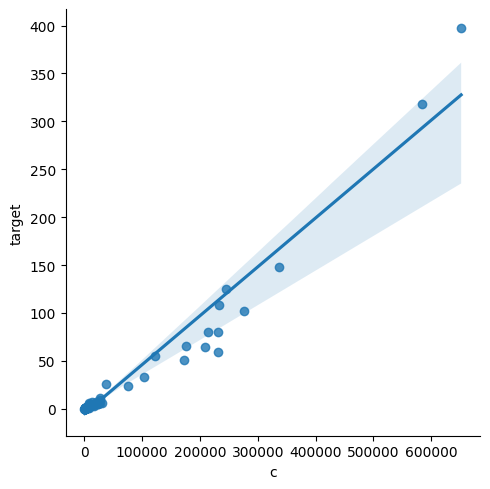

<Figure size 1000x700 with 0 Axes>

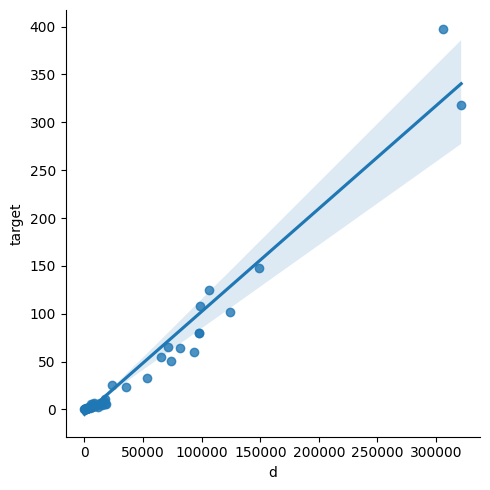

<Figure size 1000x700 with 0 Axes>

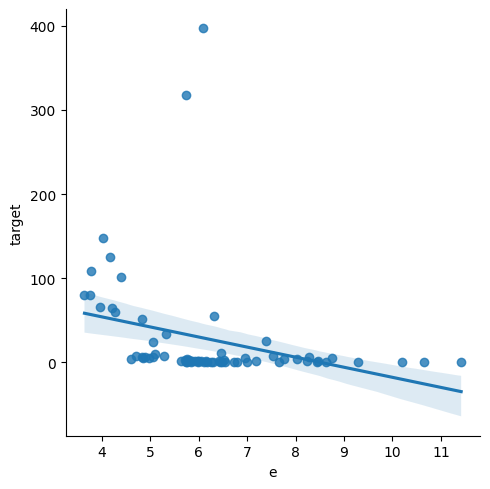

<Figure size 1000x700 with 0 Axes>

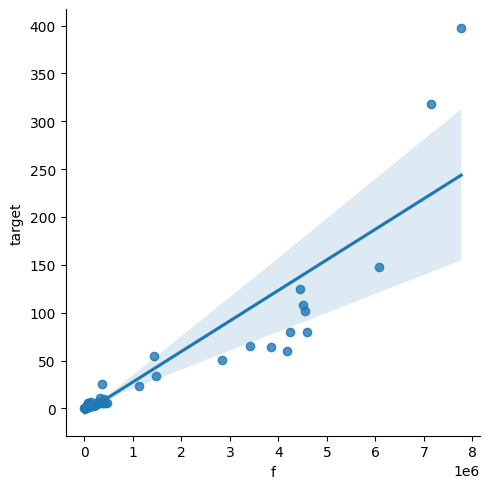

<Figure size 1000x700 with 0 Axes>

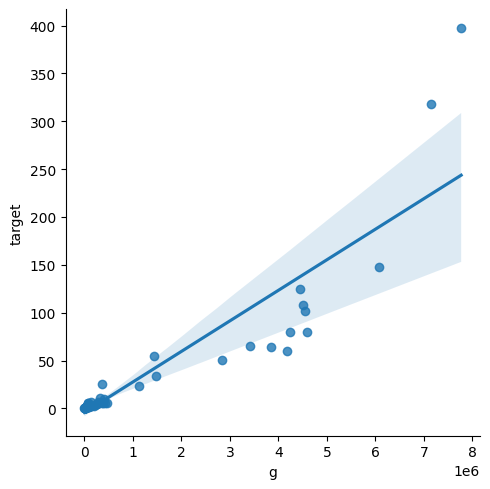

<Figure size 1000x700 with 0 Axes>

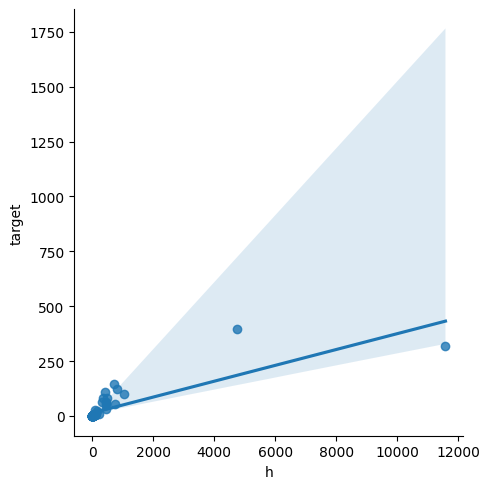

<Figure size 1000x700 with 0 Axes>

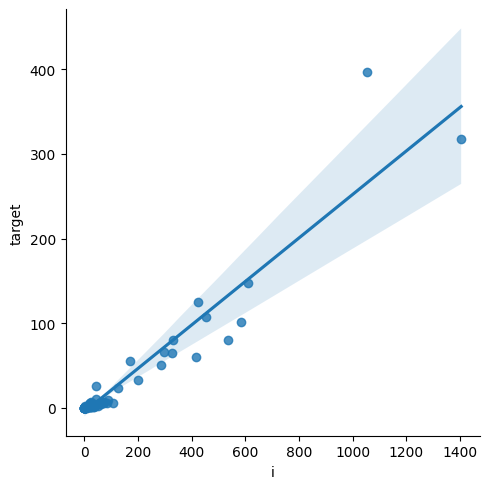

<Figure size 1000x700 with 0 Axes>

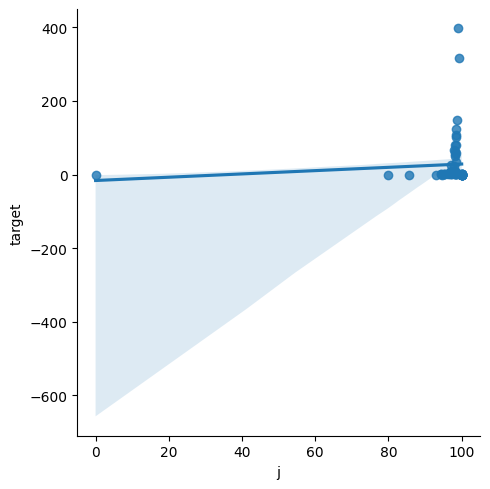

<Figure size 1000x700 with 0 Axes>

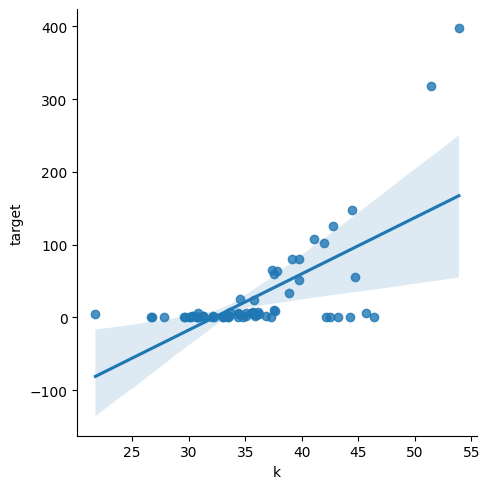

<Figure size 1000x700 with 0 Axes>

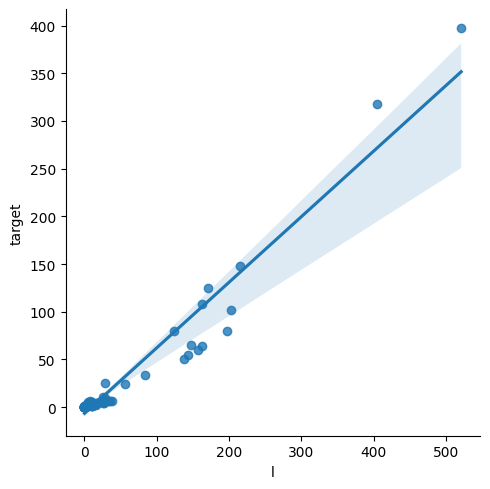

<Figure size 1000x700 with 0 Axes>

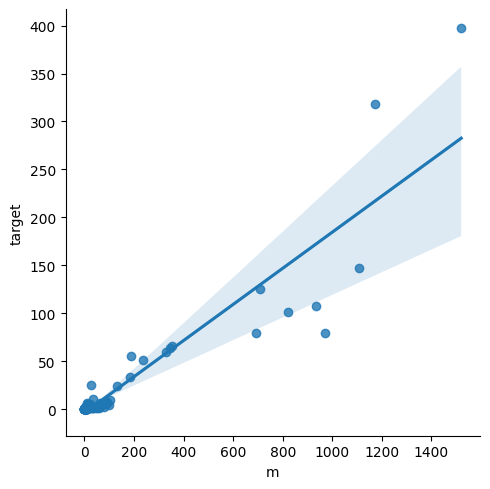

<Figure size 1000x700 with 0 Axes>

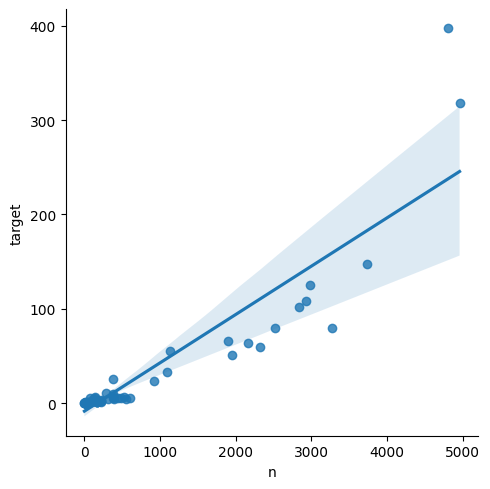

<Figure size 1000x700 with 0 Axes>

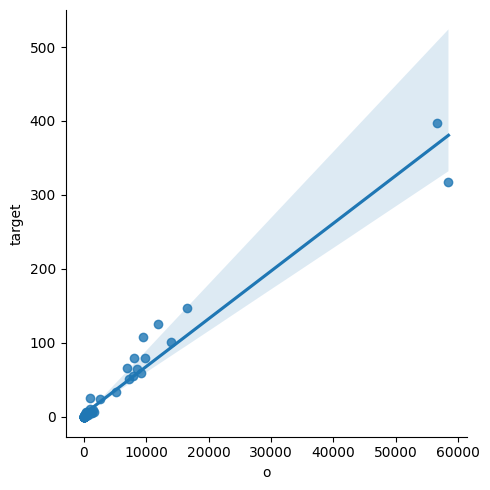

<Figure size 1000x700 with 0 Axes>

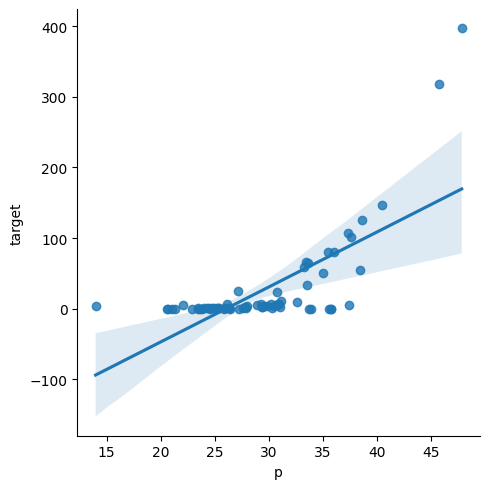

<Figure size 1000x700 with 0 Axes>

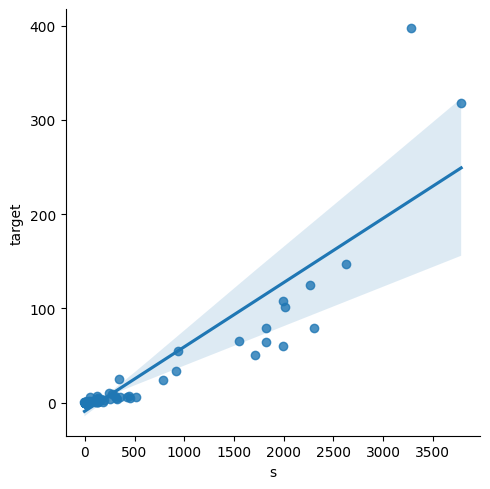

<Figure size 1000x700 with 0 Axes>

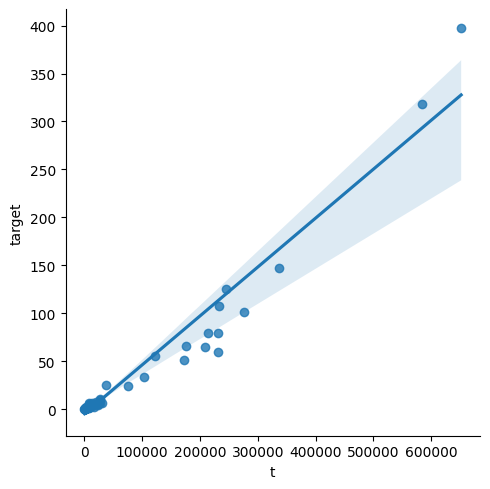

<Figure size 1000x700 with 0 Axes>

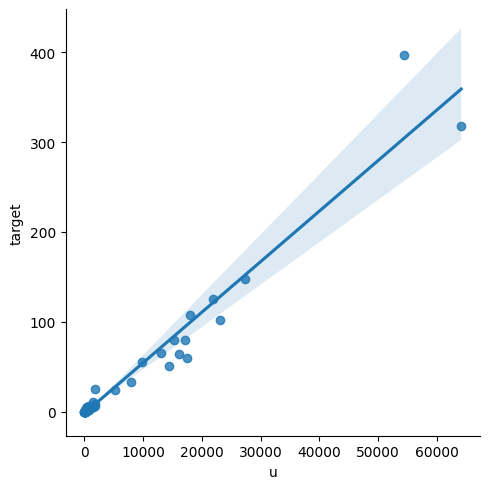

In [18]:
for i in cate_cols:
    if i not in ['q','r','v']:
         plt.figure(figsize=(10,7))
         sns.lmplot(x=i, y='target', data=data)

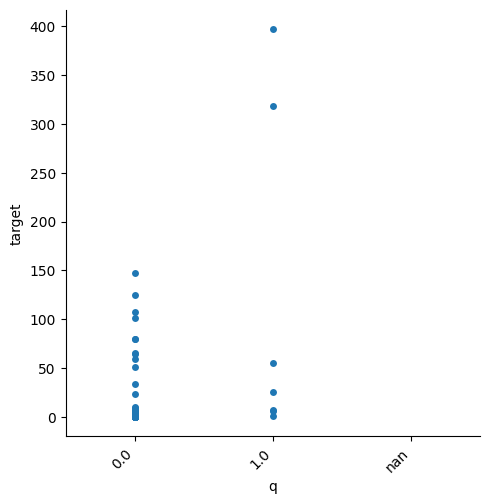

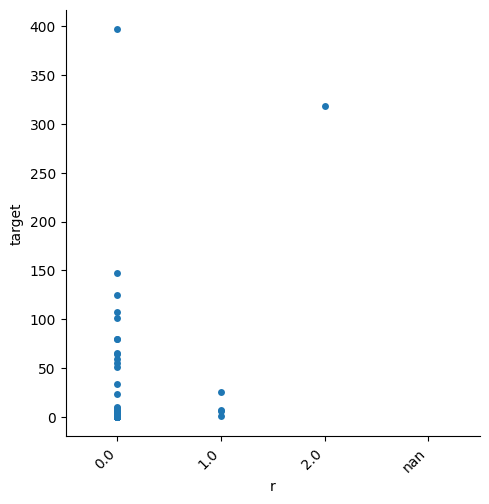

In [19]:
for i in ['q', 'r']:
    sns.catplot(data=data, x=i, y='target', jitter=False)
    plt.xticks(rotation = 45, ha = 'right')

# ****Model Training****

In [20]:
xgb =  GradientBoostingRegressor()
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of boosting stages
    'learning_rate': [0.01, 0.1, 0.2],  # Step size shrinkage used in update to prevent overfitting
    'max_depth': [3, 4, 5],  # Maximum depth of the individual trees
    'min_samples_split': [2, 3, 4],  # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 3]  # Minimum number of samples required to be at a leaf node
}

grid_search = GridSearchCV(estimator=xgb, param_grid=param_grid, cv=5)

# catboost=CatBoostRegressor()
# param_grid = {
#     'learning_rate': [0.01,0.02,0.05, 0.1, 0.2, 0.3],
#     'depth': [3, 4, 5, 6, 7, 9],
#     'l2_leaf_reg': [1, 3, 5, 7, 9],
#     'iterations': [100, 200, 300, 400],
#     'loss_function': ['RMSE', 'MultiRMSE', 'MAE'],
# }
# grid_search = GridSearchCV(estimator=catboost, param_grid=param_grid,cv=5)
grid_search.fit(train_data, train_target)
# lgb_classifier = lgb.LGBMClassifier()

# Create a parameter grid for GridSearchCV
# param_grid = {
#     'n_estimators': [100, 200, 300],           # Number of boosting rounds
#     'learning_rate': [0.01, 0.1, 0.2],        # Learning rate
#     'max_depth': [5, 7, 9],                   # Maximum tree depth
#     'subsample': [0.8, 0.9, 1.0],             # Fraction of samples used for training
#     'colsample_bytree': [0.8, 0.9, 1.0]       # Fraction of features used for training
# }
# grid_search = GridSearchCV(estimator=lgb_classifier, param_grid=param_grid, cv=5, scoring='roc_auc')
# grid_search.fit(train_data, train_target)

GridSearchCV(cv=5, estimator=GradientBoostingRegressor(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 4, 5], 'min_samples_leaf': [1, 2, 3],
                         'min_samples_split': [2, 3, 4],
                         'n_estimators': [50, 100, 200]})

In [21]:
# from keras.models import Sequential
# from keras.layers import Dense,Dropout
# from sklearn.preprocessing import StandardScaler
# model = Sequential() 
# model.add(Dense(128, activation='relu',kernel_initializer='normal',input_dim=21))
# model.add(Dense(64, activation='relu',kernel_initializer='normal'))
# model.add(Dense(32, activation='relu',kernel_initializer='normal'))
# model.add(Dense(1, activation='linear',kernel_initializer='normal')) 
# model.compile(loss='mean_squared_error', optimizer='adam', metrics=['accuracy']) 
# sscaler = StandardScaler()
# train_data = sscaler.fit_transform(train_data)
# model.fit(train_data, train_target, epochs=0, batch_size=20)

In [22]:
arr=grid_search.best_estimator_.predict(test_data)
print(arr)

[1.41853362 6.47380196 0.22516212 ... 8.85727227 1.58767119 3.65047085]


In [23]:
submission = pd.DataFrame({'Id': range(1,len(arr)+1), 'target': arr})
print(submission)
submission.to_csv('submission1.csv', index=False)

        Id    target
0        1  1.418534
1        2  6.473802
2        3  0.225162
3        4  0.196498
4        5  5.286387
...    ...       ...
1059  1060  0.203558
1060  1061  8.725786
1061  1062  8.857272
1062  1063  1.587671
1063  1064  3.650471

[1064 rows x 2 columns]
